<a href="https://colab.research.google.com/github/Zambom/Project_ES290/blob/main/localizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
#!ls "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance

## Análise e divisão dos dados

In [ ]:
df_bts = pd.read_csv("/content/drive/My Drive/Dados_BTSs.csv")
df_bts

,name,lat,lon,band,bcch,eirp,bts
0,136_2,-8.068361,-34.892722,GSM1800,662,55.59,BTS-1
1,137_3,-8.075917,-34.894611,GSM1800,806,55.59,BTS-2
2,197_1,-8.076361,-34.908000,GSM1800,666,55.59,BTS-3
3,137_1,-8.075917,-34.894611,GSM1800,690,55.59,BTS-4
4,138_2,-8.066000,-34.889444,GSM1800,673,55.59,BTS-5
5,245_2,-8.064583,-34.894583,GSM1800,682,55.59,BTS-6


In [ ]:
df = pd.read_csv("/content/drive/My Drive/LocTreino_Equipe_4.csv")
df = df.dropna()

In [ ]:
df.head()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
0,2025,-8.068464,-34.897129,106.790000,122.190,114.056667,123.456667,130.123333,111.190000,0.0,1,2,1,1,0.0
1,1073,-8.071859,-34.897263,104.056667,114.790,122.523333,104.023333,129.923333,114.323333,1.0,0,2,0,1,1.0
2,889,-8.072604,-34.896393,104.790000,114.990,114.256667,107.556667,126.190000,135.790000,1.0,0,2,0,1,1.0
3,1619,-8.069527,-34.889515,121.815000,135.215,132.565000,115.340000,100.790000,135.140000,0.0,1,3,1,0,1.0
4,2932,-8.060418,-34.905537,134.640000,120.090,129.190000,128.440000,137.040000,129.290000,3.0,3,3,3,3,2.0


In [ ]:
df.describe()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,1439.524733,-8.070247,-34.895093,116.413469,118.708401,123.592616,115.980256,122.051927,126.663599,0.762740,0.985963,2.457219,0.985963,1.140374,1.123994
std,851.146153,0.004239,0.004318,12.123122,12.534384,9.183161,12.338160,12.475839,27.802419,1.476916,0.818966,0.966067,0.818966,0.838266,1.125021
min,1.000000,-8.077576,-34.906830,85.690000,76.423333,88.790000,84.056667,80.123333,87.523333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,699.750000,-8.073529,-34.898252,106.590000,111.381667,118.935833,107.056667,114.315000,115.835833,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
50%,1392.500000,-8.070139,-34.895741,117.556667,119.523333,124.190000,116.606667,123.512561,128.656667,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,2172.250000,-8.067198,-34.891866,124.723333,128.565000,129.752500,125.798333,131.002500,136.056667,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000
max,2955.000000,-8.059339,-34.885078,144.290000,144.890000,145.890000,145.423333,146.890000,779.603100,33.303617,4.000000,5.000000,4.000000,3.000000,25.115327


In [ ]:
df.dtypes

pontoId       int64
lat         float64
lon         float64
pathBTS1    float64
pathBTS2    float64
pathBTS3    float64
pathBTS4    float64
pathBTS5    float64
pathBTS6    float64
taBTS1      float64
taBTS2        int64
taBTS3        int64
taBTS4        int64
taBTS5        int64
taBTS6      float64
dtype: object

In [ ]:
df['taBTS1'] = df['taBTS1'].astype('int64')
df['taBTS6'] = df['taBTS6'].astype('int64')

In [ ]:
df.describe()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,1439.524733,-8.070247,-34.895093,116.413469,118.708401,123.592616,115.980256,122.051927,126.663599,0.760695,0.985963,2.457219,0.985963,1.140374,1.123663
std,851.146153,0.004239,0.004318,12.123122,12.534384,9.183161,12.338160,12.475839,27.802419,1.448867,0.818966,0.966067,0.818966,0.838266,1.120834
min,1.000000,-8.077576,-34.906830,85.690000,76.423333,88.790000,84.056667,80.123333,87.523333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,699.750000,-8.073529,-34.898252,106.590000,111.381667,118.935833,107.056667,114.315000,115.835833,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
50%,1392.500000,-8.070139,-34.895741,117.556667,119.523333,124.190000,116.606667,123.512561,128.656667,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,2172.250000,-8.067198,-34.891866,124.723333,128.565000,129.752500,125.798333,131.002500,136.056667,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000
max,2955.000000,-8.059339,-34.885078,144.290000,144.890000,145.890000,145.423333,146.890000,779.603100,33.000000,4.000000,5.000000,4.000000,3.000000,25.000000


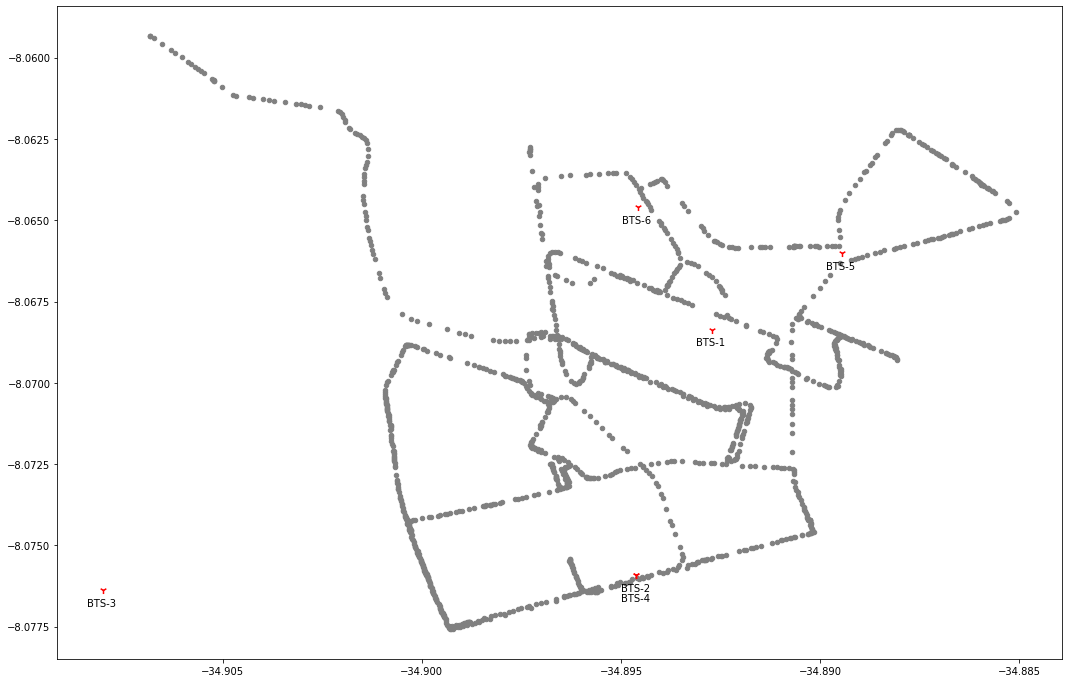

In [ ]:
fig, subs = plt.subplots()

subs.scatter(df['lon'], df['lat'], color = 'gray', s = 20)
subs.scatter(df_bts['lon'], df_bts['lat'], color = 'red', s = 50, alpha = 1, marker = '1')

for i, row in df_bts.iterrows():
  if i == 3:
    subs.annotate(row['bts'], (row['lon'], row['lat']), xytext = (row['lon']-0.0004, row['lat']-0.0008))
  else:  
    subs.annotate(row['bts'], (row['lon'], row['lat']), xytext = (row['lon']-0.0004, row['lat']-0.0005))

plt.gcf().set_size_inches((18,12))
plt.show()

In [222]:
from sklearn.model_selection import train_test_split

x = df[['pontoId', 'pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]
y = df[['lat', 'lon']]

x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=7)

In [223]:
print(f'{len(x_train)},{len(x_test)}')

1346,150


## Funções úteis

In [ ]:
MIN_LAT = df['lat'].min()
MAX_LAT = df['lat'].max()

MIN_LON = df['lon'].min()
MAX_LON = df['lon'].max()

In [ ]:
def coordSizeMeters(max, min):
  return (max - min)*111*1000

In [ ]:
x_size = coordSizeMeters(MAX_LON, MIN_LON)
y_size = coordSizeMeters(MAX_LAT, MIN_LAT)

print(f'{x_size},{y_size}')

2414.471999999925,2024.307000000105


In [ ]:
import os

def createFolder(folder):
  if not os.path.isdir(folder):
    os.mkdir(folder)

def createGrid(xLength, yLength, cellSize):
  grid = []
  
  nX = math.ceil((xLength / cellSize))
  nY = math.ceil((yLength / cellSize))

  inc_lat = (MAX_LAT - MIN_LAT) / nX
  inc_lon = (MAX_LON - MIN_LON) / nY

  for i in range(nX):
    for j in range(nY):
      lat = MIN_LAT + j * inc_lat
      lon = MIN_LON + i * inc_lon

      grid.append((lon, lat))

  grid_map = pd.DataFrame(grid, columns=['lon', 'lat'])

  createFolder('./grids')

  grid_map.to_csv("./grids/grid_{}.csv".format(cellSize), index=False)

In [ ]:
createGrid(x_size, y_size, 20)

In [ ]:
def okumuraHata(frequency, height_base, height_antena, dist):
  loss = 69.55 + 26.16*np.log10(frequency) - 13.82*np.log10(height_base)
  loss = loss - 3.2*(np.log10(11.75*height_antena))**2 - 4.97
  loss = loss + (44.9 - 6.55*np.log10(height_base))*np.log10(dist)

  return loss/2

In [ ]:
def haversineDistance(lat1, lon1, lat2, lon2):
  earthRadius = 6371e3
  phi_1 = lat1 * math.pi/180
  phi_2 = lat2 * math.pi/180
  delta_phi = (lat2 - lat1) * math.pi/180
  delta_lambda = (lon2 - lon1) * math.pi/180

  a = math.sin(delta_phi/2)**2 + math.cos(phi_1) * math.cos(phi_2) * (math.sin(delta_lambda/2)**2)

  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

  return earthRadius * c

## Modelo Teórico

In [ ]:
def pathLoss(grid, bts):
  result = []

  bts_lat = bts['lat']
  bts_lon = bts['lon']

  for i, point in grid.iterrows():
    lat = point['lat']
    lon = point['lon']

    distance = haversineDistance(bts_lat, bts_lon, lat, lon)
    loss = okumuraHata(1800, 50.0, 1.5, distance)

    result.append(loss)

  return result

In [ ]:
def generateFingerprint(cellSize):
  grid = pd.read_csv("./grids/grid_{}.csv".format(cellSize))

  pathdict = {}

  for i, bts in df_bts.iterrows():
    name = bts['bts']
    pathdict[name] = pathLoss(grid, bts)

  fingerprint = pd.DataFrame(pathdict)
  fingerprint.insert(0, 'lat', grid['lat'], True)
  fingerprint.insert(1, 'lon', grid['lon'], True)

  createFolder('./fingerprints')

  fingerprint.to_csv('./fingerprints/fingerprint_{}.csv'.format('teorico'), index=False)

In [ ]:
generateFingerprint(20)

In [ ]:
def predictTheorical(fingerprint, data):
  results = { 'pointId': [], 'lat_pred': [], 'lon_pred': [] }

  for i, row in data.iterrows():
    dataframe = fingerprint.copy()

    dataframe['distance'] = dataframe.apply(lambda r: distance.euclidean(r[2:], row[1:]), axis=1)

    dataframe = dataframe.sort_values(by='distance',ascending=True)
    dataframe = dataframe.reset_index()

    entry = dataframe.loc[0, ['lat', 'lon']]

    results['pointId'].append(row['pontoId'])
    results['lat_pred'].append(entry['lat'])
    results['lon_pred'].append(entry['lon'])

  return pd.DataFrame(results)

In [ ]:
fingerprint = pd.read_csv('./fingerprints/fingerprint_teorico.csv')

predictions = predictTheorical(fingerprint, x_test)

predictions.head()

,pointId,lat_pred,lon_pred
0,2032.0,-8.062353,-34.902778
1,1765.0,-8.062353,-34.906830
2,1714.0,-8.075164,-34.887850
3,1684.0,-8.077576,-34.891262
4,2620.0,-8.077576,-34.881239


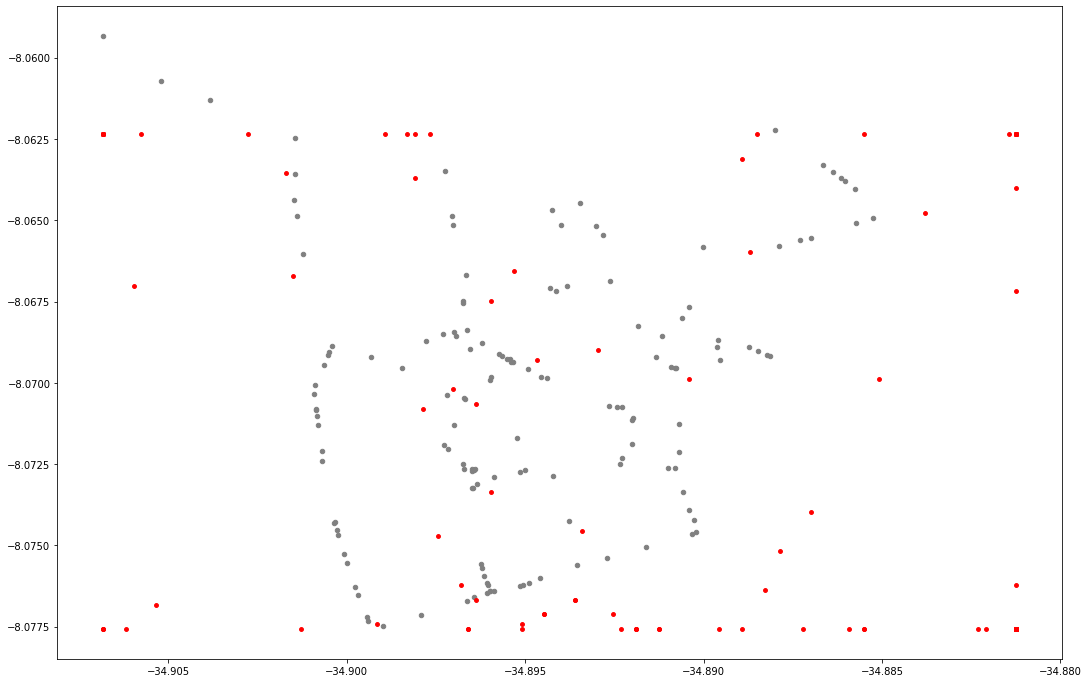

In [ ]:
fig, subs = plt.subplots()

subs.scatter(Y_test['lon'], Y_test['lat'], color = 'gray', s = 20)
subs.scatter(predictions['lon_pred'], predictions['lat_pred'], color = 'red', s = 15, alpha = 1)

plt.gcf().set_size_inches((18,12))
plt.show()

In [ ]:
validation = Y_test.copy()
validation.reset_index(inplace=True)

In [ ]:
predictions.insert(0, 'lat', validation['lat'], True)
predictions.insert(1, 'lon', validation['lon'], True)
predictions

,lat,lon,pointId,lat_pred,lon_pred
0,-8.068447,-34.896996,2032.0,-8.062353,-34.902778
1,-8.069142,-34.900517,1765.0,-8.062353,-34.906830
2,-8.069274,-34.895439,1714.0,-8.075164,-34.887850
3,-8.069349,-34.895409,1684.0,-8.077576,-34.891262
4,-8.064366,-34.901470,2620.0,-8.077576,-34.881239
...,...,...,...,...,...
145,-8.061305,-34.903843,2901.0,-8.077576,-34.881239
146,-8.060712,-34.905216,2919.0,-8.077576,-34.881239
147,-8.062220,-34.888000,2870.0,-8.077576,-34.881239
148,-8.074223,-34.890274,596.0,-8.077576,-34.881239


In [ ]:
predictions['diff_metros'] = predictions.apply(lambda r: haversineDistance(r[0], r[1], r[3], r[4]), axis=1)
predictions

,lat,lon,pointId,lat_pred,lon_pred,diff_metros
0,-8.068447,-34.896996,2032.0,-8.062353,-34.902778,929.707986
1,-8.069142,-34.900517,1765.0,-8.062353,-34.906830,1026.099255
2,-8.069274,-34.895439,1714.0,-8.075164,-34.887850,1061.609192
3,-8.069349,-34.895409,1684.0,-8.077576,-34.891262,1022.381217
4,-8.064366,-34.901470,2620.0,-8.077576,-34.881239,2668.013569
...,...,...,...,...,...,...
145,-8.061305,-34.903843,2901.0,-8.077576,-34.881239,3076.705766
146,-8.060712,-34.905216,2919.0,-8.077576,-34.881239,3237.938928
147,-8.062220,-34.888000,2870.0,-8.077576,-34.881239,1862.677912
148,-8.074223,-34.890274,596.0,-8.077576,-34.881239,1062.219874


In [ ]:
predictions['diff_metros'].describe()

count     150.000000
mean     1288.048559
std       615.287635
min       155.599439
25%       930.719344
50%      1207.602348
75%      1628.697322
max      3471.286493
Name: diff_metros, dtype: float64

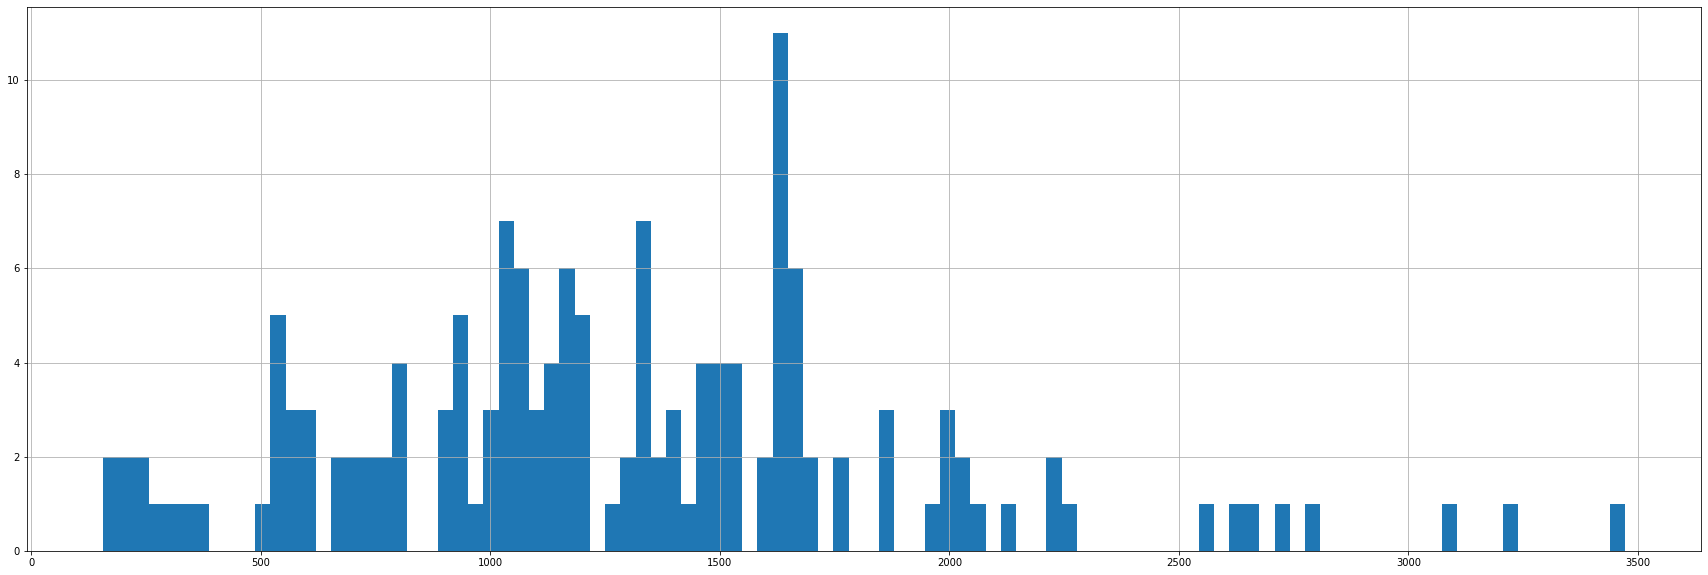

In [ ]:
predictions['diff_metros'].hist(bins=100, figsize=(30,10))

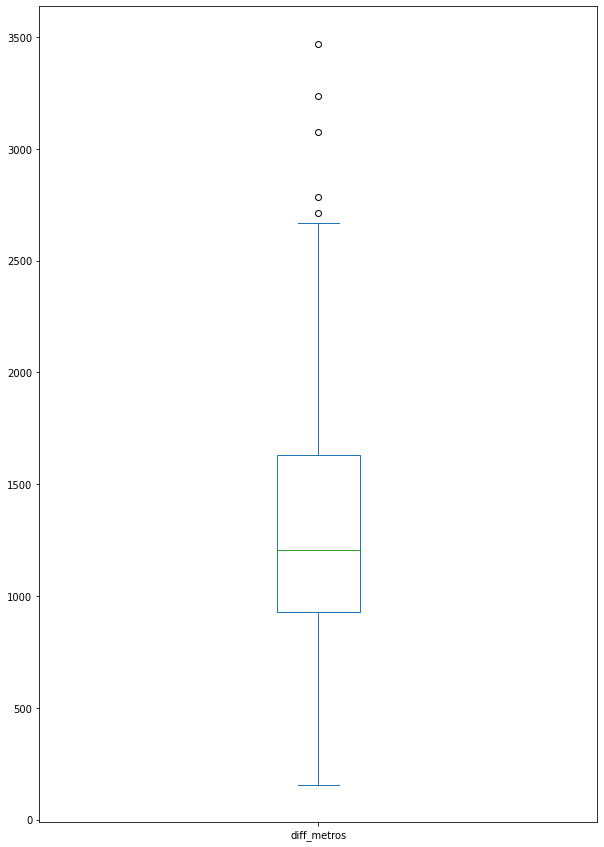

In [ ]:
predictions['diff_metros'].plot(kind='box', figsize=(10,15))

## Modelo Proposto


In [228]:
x = df[['pontoId', 'lat', 'lon']]
y = df[['pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]

In [ ]:
def getDataFrameDistances(data):
  for i, bts in df_bts.iterrows():
    data['dist_{}'.format(bts['bts'])] = data.apply(lambda r: haversineDistance(r['lat'], r['lon'], bts['lat'], bts['lon']), axis=1)

In [229]:
getDataFrameDistances(x)

x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pontoId,lat,lon,dist_BTS-1,dist_BTS-2,dist_BTS-3,dist_BTS-4,dist_BTS-5,dist_BTS-6
0,2025,-8.068464,-34.897129,485.295701,873.832271,1484.411177,873.832250,889.286369,514.538108
1,1073,-8.071859,-34.897263,633.396816,537.411556,1283.701716,537.411520,1079.526388,861.129078
2,889,-8.072604,-34.896393,621.211910,417.332974,1344.403133,417.332943,1060.404899,913.840134
3,1619,-8.069527,-34.889515,376.143162,905.307289,2172.321776,905.307330,392.261425,783.288884
4,2932,-8.060418,-34.905537,1664.509334,2101.649491,1793.411306,2101.649453,1877.298320,1291.837355
...,...,...,...,...,...,...,...,...,...
1495,652,-8.073855,-34.898685,896.734915,503.696750,1062.698213,503.696691,1340.838176,1125.521101
1496,2496,-8.065498,-34.886887,716.984820,1437.103686,2619.529736,1437.103725,287.041571,853.411109
1497,2163,-8.067300,-34.893856,171.762504,961.729423,1854.697323,961.729428,506.743938,312.512674
1498,1519,-8.069776,-34.897877,588.914502,771.691795,1333.494594,771.691765,1018.909324,681.819742


In [230]:
x_mlp_train, x_mlp_test, Y_mlp_train, Y_mlp_test = train_test_split(x, y, test_size=0.1, random_state=7)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [241]:
def generateMLPFingerprint(cellSize):
  grid = pd.read_csv("./grids/grid_{}.csv".format(cellSize))

  pathdict = {}

  getDataFrameDistances(grid)

  regr = MLPRegressor(random_state=7, max_iter=500, learning_rate='constant', hidden_layer_sizes=(100,50,100))
  regr.fit(x_mlp_train.drop('pontoId', axis=1), Y_mlp_train)

  predictions = regr.predict(grid)

  pathdict = {}
  for i, bts in df_bts.iterrows():
    name = bts['bts']
    pathdict[name] = predictions[:,i]

  fingerprint = pd.DataFrame(pathdict)
  fingerprint.insert(0, 'lat', grid['lat'], True)
  fingerprint.insert(1, 'lon', grid['lon'], True)

  createFolder('./fingerprints')

  fingerprint.to_csv('./fingerprints/fingerprint_{}.csv'.format('mlp'), index=False)

In [242]:
regressor = generateMLPFingerprint(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [243]:
fingerprint = pd.read_csv('./fingerprints/fingerprint_mlp.csv')

predictions = predictTheorical(fingerprint, x_test)

predictions.head()

,pointId,lat_pred,lon_pred
0,2032.0,-8.068834,-34.900006
1,1765.0,-8.065669,-34.894888
2,1714.0,-8.069588,-34.896167
3,1684.0,-8.069437,-34.896594
4,2620.0,-8.063861,-34.901499


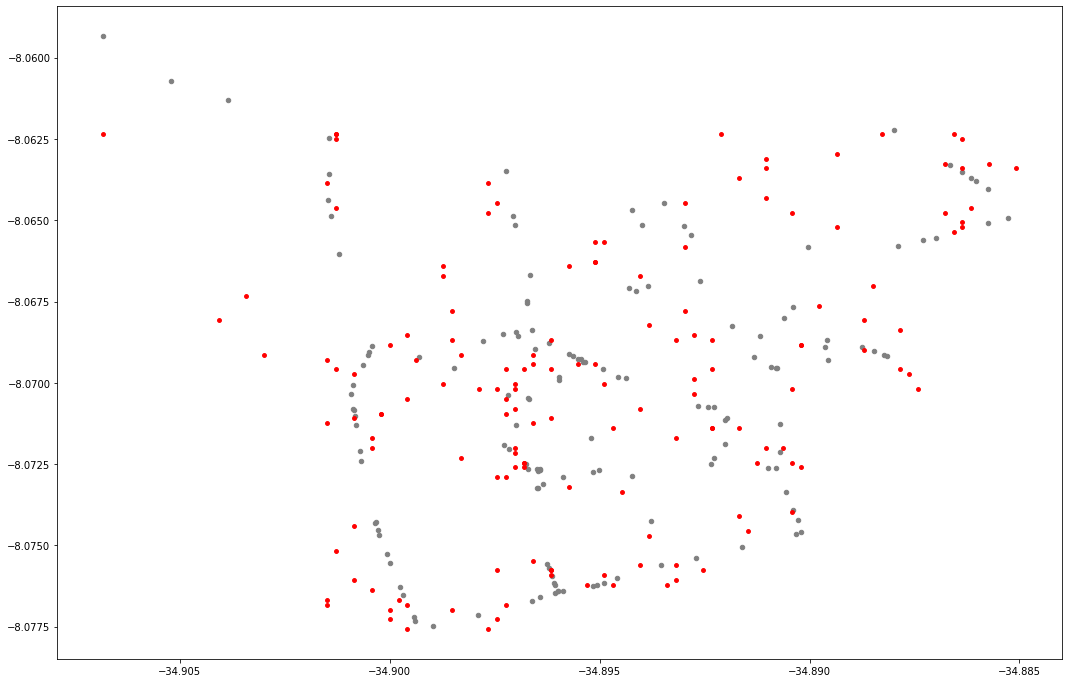

In [244]:
fig, subs = plt.subplots()

subs.scatter(Y_test['lon'], Y_test['lat'], color = 'gray', s = 20)
subs.scatter(predictions['lon_pred'], predictions['lat_pred'], color = 'red', s = 15, alpha = 1)

plt.gcf().set_size_inches((18,12))
plt.show()

In [245]:
validation = Y_test.copy()
validation.reset_index(inplace=True)

In [246]:
predictions.insert(0, 'lat', validation['lat'], True)
predictions.insert(1, 'lon', validation['lon'], True)
predictions

,lat,lon,pointId,lat_pred,lon_pred
0,-8.068447,-34.896996,2032.0,-8.068834,-34.900006
1,-8.069142,-34.900517,1765.0,-8.065669,-34.894888
2,-8.069274,-34.895439,1714.0,-8.069588,-34.896167
3,-8.069349,-34.895409,1684.0,-8.069437,-34.896594
4,-8.064366,-34.901470,2620.0,-8.063861,-34.901499
...,...,...,...,...,...
145,-8.061305,-34.903843,2901.0,-8.062353,-34.901285
146,-8.060712,-34.905216,2919.0,-8.062504,-34.901285
147,-8.062220,-34.888000,2870.0,-8.062353,-34.886571
148,-8.074223,-34.890274,596.0,-8.073959,-34.890409


In [247]:
predictions['diff_metros'] = predictions.apply(lambda r: haversineDistance(r[0], r[1], r[3], r[4]), axis=1)
predictions

,lat,lon,pointId,lat_pred,lon_pred,diff_metros
0,-8.068447,-34.896996,2032.0,-8.068834,-34.900006,334.152928
1,-8.069142,-34.900517,1765.0,-8.065669,-34.894888,730.212782
2,-8.069274,-34.895439,1714.0,-8.069588,-34.896167,87.444281
3,-8.069349,-34.895409,1684.0,-8.069437,-34.896594,130.803407
4,-8.064366,-34.901470,2620.0,-8.063861,-34.901499,56.289530
...,...,...,...,...,...,...
145,-8.061305,-34.903843,2901.0,-8.062353,-34.901285,304.761411
146,-8.060712,-34.905216,2919.0,-8.062504,-34.901285,476.423292
147,-8.062220,-34.888000,2870.0,-8.062353,-34.886571,158.048199
148,-8.074223,-34.890274,596.0,-8.073959,-34.890409,32.947406


In [248]:
predictions['diff_metros'].describe()

count     150.000000
mean      249.961029
std       318.329723
min        17.105447
25%        86.583117
50%       138.804418
75%       236.800489
max      2069.953982
Name: diff_metros, dtype: float64

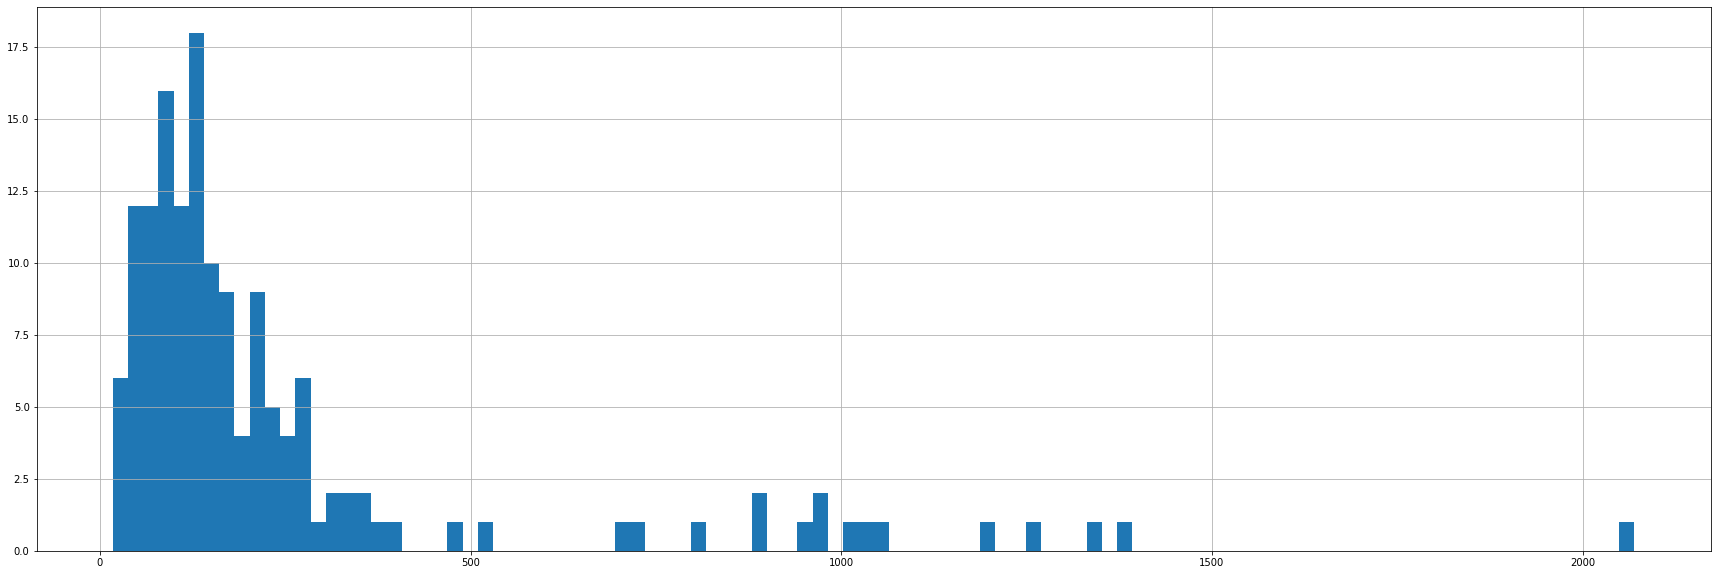

In [249]:
predictions['diff_metros'].hist(bins=100, figsize=(30,10))

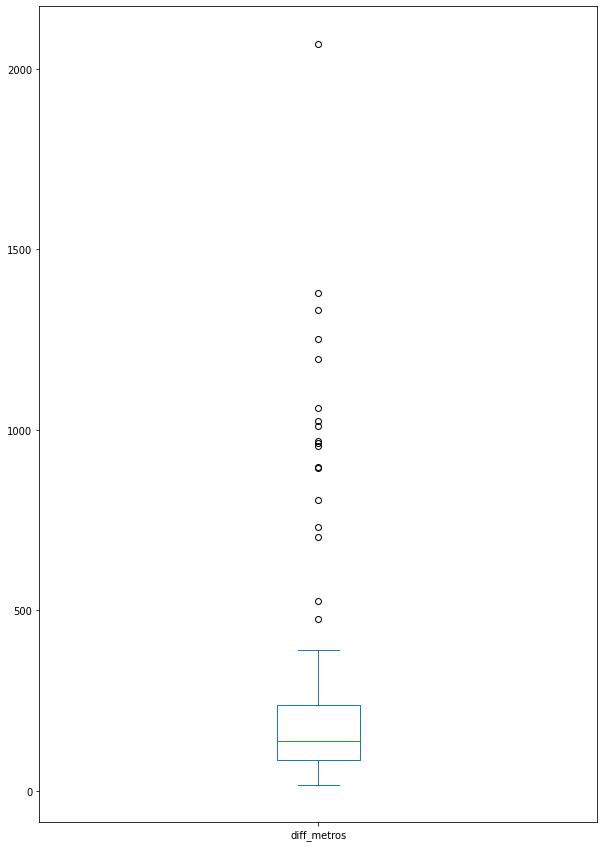

In [250]:
predictions['diff_metros'].plot(kind='box', figsize=(10,15))